In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

/home/czk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import numpy as np

mnist_train = mnist.train.images
mnist_labels = np.asarray(mnist.train.labels, dtype = np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)



In [3]:
mnist_train.shape
eval_data.shape

(10000, 784)

In [4]:
mnist_labels.shape

(55000,)

(-0.5, 27.5, 27.5, -0.5)

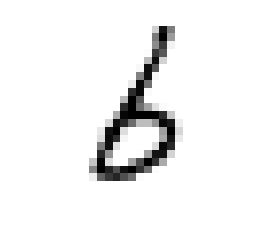

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_random_figure = mnist_train[2342];
some_random_figure = some_random_figure.reshape(28, 28)
plt.imshow(some_random_figure, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")


In [6]:
import numpy as np

shuffle_index = np.random.permutation(55000)
X_train, y_train = mnist_train[shuffle_index], mnist_labels[shuffle_index]


In [7]:
# Task 1: Identify all 5s

y_train_5 = (y_train == 5)

X_train.shape
eval_data.shape

from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state = 32)
SGD.fit(X_train, y_train_5)

SGD.predict([eval_data[234]])





/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([False])

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGD, X_train, y_train_5, cv = 3, scoring="accuracy")


/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

array([0.96258318, 0.96154476, 0.96367207])

In [9]:
## construct a trivial classifier and see its effect
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
    

In [10]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.91033053, 0.90656194, 0.91108929])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SGD, X_train, y_train_5, cv = 3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

array([[49178,   835],
       [ 1222,  3765]])

In [12]:
# Precision: the percentage that you predict correctly
# Recall: the percantage that you successfully find out the target

In [13]:
y_scores = cross_val_predict(SGD, X_train, y_train_5, cv = 3, method="decision_function")

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

In [14]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold_curve = precision_recall_curve(y_train_5, y_scores)

In [15]:
threshold_curve
precisions

array([0.09149284, 0.09147617, 0.09147785, ..., 1.        , 1.        ,
       1.        ])

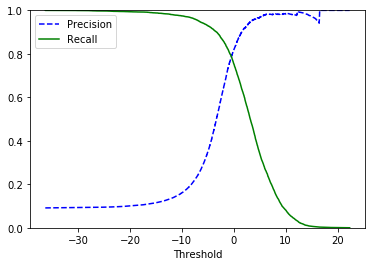

In [16]:
def plot_precision_recall_vs_precision(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0, 1])

plot_precision_recall_vs_precision(precisions, recalls, threshold_curve)
plt.show()

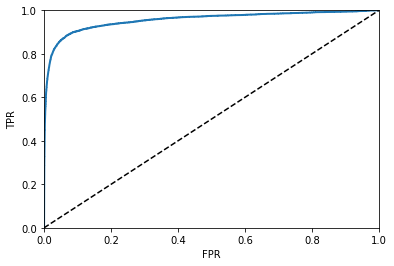

In [17]:
#ROC Curve: Plot Recall against 1 - specificity 
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

# the dotted line represents a totally random classifier, we should stay far away from it

In [18]:
# roc-auc score (area under curve)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9557083596203627

In [19]:
## The result of a random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method="predict_proba")


In [20]:
y_probas_forest

array([[1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       ...,
       [0.7, 0.3],
       [1. , 0. ],
       [1. , 0. ]])

In [21]:
y_scores_forest = y_probas_forest[:, 1]
# we get the second column, which represents the probability to be the positive class
y_scores_forest

array([0. , 0. , 0.5, ..., 0.3, 0. , 0. ])

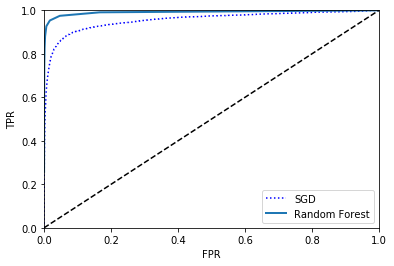

In [22]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = "lower right")
plt.show()

In [23]:
## multiclass classification
## One-vs-All strategy for most of binary classfiers
## One-vs-One for SVM

some_digit = X_train[36000]
some_digit.shape
SGD.fit(X_train, y_train)
SGD.predict([some_digit])

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1], dtype=int32)

In [24]:
some_digit_decision_function_score = SGD.decision_function([some_digit])
some_digit_decision_function_score

array([[-43.48303129,   3.63653799,  -5.33197548,  -3.81381652,
        -12.53904353,  -5.24422025, -10.09388608,  -5.14502361,
         -9.03125185,  -4.44202473]])

In [25]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

array([1], dtype=int32)

In [26]:
forest_clf.fit(X_train, y_train)
forest_clf.predict_proba([some_digit])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
# Just scaling the input can improve accuray a lot

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(SGD, X_train_scaled, y_train, cv = 3, scoring="accuracy")

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

array([0.90745487, 0.90907107, 0.90643753])

In [28]:
y_train_pred = cross_val_predict(SGD, X_train_scaled, y_train, cv = 3)
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/czk/anaconda3/li

array([[5262,    3,   21,    9,   10,   46,   39,    8,   40,    6],
       [   2, 5924,   44,   22,    5,   39,    8,   10,  112,   13],
       [  55,   36, 4874,   95,   88,   24,   91,   58,  135,   14],
       [  42,   36,  122, 4892,    3,  226,   35,   52,  146,   84],
       [  18,   24,   27,    6, 4864,    8,   47,   35,   84,  194],
       [  73,   49,   25,  157,   65, 4256,   97,   27,  150,   88],
       [  32,   24,   39,    2,   39,   95, 5146,    6,   34,    0],
       [  24,   18,   59,   27,   49,   12,    5, 5300,   13,  208],
       [  49,  144,   61,  142,   16,  166,   50,   28, 4601,  132],
       [  36,   29,   27,   75,  161,   37,    2,  211,   74, 4802]])

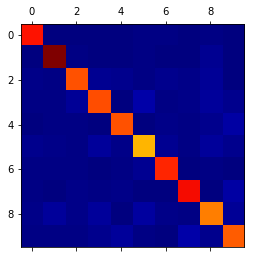

In [29]:
plt.matshow(conf_mat, cmap = plt.cm.jet)
plt.show()

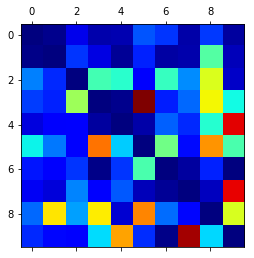

In [30]:
row_sums = conf_mat.sum(axis = 1, keepdims=True)
norm_conf_mat = conf_mat / row_sums

np.fill_diagonal(norm_conf_mat, 0) # get rid of correct case
plt.matshow(norm_conf_mat, cmap = plt.cm.jet)
plt.show()

In [31]:
# multiclass classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [33]:
# y_train_knn_predict = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
# f1_score(y_train, y_train_knn_predict, average = 'macro')

In [34]:
import numpy as np

In [45]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
y_train_mod = X_train
noise = np.random.randint(0, 100, (len(eval_data), 784))
X_test_mod = eval_data  + noise
y_test_mod = eval_data